In [1]:
import re
import csv
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from tqdm import tqdm
import pickle

In [2]:
os.getcwd()

'C:\\Users\\Asus\\Desktop\\Project\\ImageRecommender'

In [3]:
# Counter for unique image names
image_counter = 0

# we should make another generator to rename the images, so that only the rename generator run once, and then we can run the generator files to get the filepath multiple times

# creating the generator
def reader(filepath, rename=False):
    '''
    This function generates through all the images file in the folder
    ''' 
    current_path = filepath 
    print(current_path)
    
    global image_counter  
    
    for foldername in os.listdir(current_path):
        folderpath = os.path.join(filepath, foldername)
        current_path = folderpath
        
        if os.path.isdir(folderpath) and not foldername.startswith('.'):
            os.chdir(folderpath)
            print(folderpath)
            
            for file in os.listdir(folderpath):
                if file.endswith(".jpg") or file.endswith(".png"): 
                    with open(os.path.join(folderpath, file), "rb") as f:
                        image = f.read()
                        img = cv2.imread(file)
                    
                    # check if image can be loaded correctly
                    if img is not None:   
                        #create new name
                        if file.endswith(".jpg"):
                            new_file_name = f"{image_counter: 07}_.jpg"
                        
                        else:
                            new_file_name = f"{image_counter: 07}_.png"
                        
                        os.rename(file, new_file_name)
                        
                        image_counter += 1
                        
                        # yield tuple, so later we need to use
                        yield (img, os.path.join(folderpath, new_file_name))
                        
                    else:
                        # check path or image format
                        print(f"Error while loading image: {file}")
            
            os.chdir('..')

In [4]:
def get_colour_hist(image):
    
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    # Calculate colour histogram
    red_hist = cv2.calcHist([red_channel], [0], None, [30], [0, 256])
    green_hist = cv2.calcHist([green_channel], [0], None, [30], [0, 256])
    blue_hist = cv2.calcHist([blue_channel], [0], None, [30], [0, 256])

    # Normalize the colour histogram value
    red_hist = cv2.normalize(red_hist, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    green_hist = cv2.normalize(green_hist, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    blue_hist = cv2.normalize(blue_hist, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    return red_hist, green_hist, blue_hist

In [5]:
filepath = os.path.join(os.getcwd(), "weather_image_recognition")
gen = reader(filepath)

In [11]:
# change to `filepath` for creating the csv there
os.chdir(filepath)

In [6]:
# Counter for unique image names
image_counter = 0
gen = reader(filepath) # get histogram values

master_df = pd.DataFrame()
# LOOP OVER ALL IMAGES

for image, file_path in tqdm(gen, desc="extracting RGB information from the images"):
    file_name = os.path.basename(file_path).replace(".jpg", "").replace(".png", "") # extract the filename
    rgb_array = get_colour_hist(image)
    
    # extract and format the color values
    red_channel = rgb_array[0]
    green_channel = rgb_array[1]
    blue_channel = rgb_array[2]
   
    # merged the list from RGB channel into one list
    merged_list = np.concatenate((red_channel, green_channel, blue_channel), axis=1).flatten().tolist()
    
    # create a DataFrame, tranpose it, add id and merge to master_df
    df = pd.DataFrame(merged_list)
    df = df.transpose()
    df["image_id"] = file_name.replace(' ', '')
    df["file_path"] = file_path
    df = df.set_index('image_id')
    
    master_df = pd.concat([master_df, df])
    
master_df.to_csv('color_histogram.csv')

extracting RGB information from the images: 12it [00:00, 113.18it/s]

C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition
C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\dew


extracting RGB information from the images: 730it [00:07, 145.63it/s]

C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\fogsmog


extracting RGB information from the images: 1552it [00:13, 98.57it/s] 

Error while loading image: 4514.jpg
C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\frost


extracting RGB information from the images: 2042it [00:21, 87.75it/s] 

C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\glaze


extracting RGB information from the images: 2674it [00:25, 120.20it/s]

C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\hail


extracting RGB information from the images: 3265it [00:29, 144.96it/s]

C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\lightning


extracting RGB information from the images: 3647it [00:32, 130.05it/s]

C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\rain


extracting RGB information from the images: 4178it [00:36, 120.11it/s]

C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\rainbow


extracting RGB information from the images: 4399it [00:38, 123.53it/s]

C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\rime


extracting RGB information from the images: 5566it [00:49, 115.97it/s]

C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\sandstorm


extracting RGB information from the images: 6252it [00:55, 124.76it/s]

C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\snow


extracting RGB information from the images: 6860it [01:00, 113.13it/s]


Error while loading image: 1187.jpg


### check csv

In [7]:
data = pd.read_csv('color_histogram.csv', index_col='image_id')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,file_path
image_id,,,,,,,,,,,,,,,,,,,,,
000000_,1.000000e+00,8.741844e-02,7.034527e-01,0.011057,0.052840,0.601915,0.003207,0.083466,0.649100,0.002313,...,0.000013,1.406734e-03,-1.437002e-10,0.000104,5.275069e-11,0.001708,0.001584,0.028443,0.021604,C:\Users\Asus\Desktop\Project\ImageRecommender...
000001_,-1.455192e-11,-1.637090e-11,-1.045919e-11,0.002393,0.005573,0.001429,0.007051,0.017359,0.005110,0.021533,...,0.389849,6.174161e-01,4.125379e-01,0.542714,8.710924e-01,0.555396,1.000000,1.000000,1.000000,C:\Users\Asus\Desktop\Project\ImageRecommender...
000002_,1.448514e-01,6.331907e-04,1.521892e-02,0.830019,0.188652,0.400394,1.000000,0.317324,1.000000,0.488636,...,0.000000,3.637979e-12,1.830213e-04,0.000039,3.637979e-12,0.000070,0.000039,0.000134,0.000000,C:\Users\Asus\Desktop\Project\ImageRecommender...
000003_,0.000000e+00,6.572029e-05,0.000000e+00,0.004035,0.008215,0.003885,0.026543,0.050210,0.028661,0.162033,...,0.007377,2.563091e-03,4.267244e-03,0.002207,1.182965e-03,0.001465,0.001135,0.000000,0.000764,C:\Users\Asus\Desktop\Project\ImageRecommender...
000004_,1.967518e-03,0.000000e+00,0.000000e+00,0.002468,0.000000,0.000074,0.002504,0.000000,0.000628,0.007691,...,0.004865,1.007302e-02,1.403405e-03,0.003470,4.596427e-03,0.001108,0.000000,0.002347,0.000222,C:\Users\Asus\Desktop\Project\ImageRecommender...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6860 entries, 000000_ to 006859_
Data columns (total 91 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          6860 non-null   float64
 1   1          6860 non-null   float64
 2   2          6860 non-null   float64
 3   3          6860 non-null   float64
 4   4          6860 non-null   float64
 5   5          6860 non-null   float64
 6   6          6860 non-null   float64
 7   7          6860 non-null   float64
 8   8          6860 non-null   float64
 9   9          6860 non-null   float64
 10  10         6860 non-null   float64
 11  11         6860 non-null   float64
 12  12         6860 non-null   float64
 13  13         6860 non-null   float64
 14  14         6860 non-null   float64
 15  15         6860 non-null   float64
 16  16         6860 non-null   float64
 17  17         6860 non-null   float64
 18  18         6860 non-null   float64
 19  19         6860 non-null   float64
 20  20  

In [9]:
data.index

Index(['000000_', '000001_', '000002_', '000003_', '000004_', '000005_',
       '000006_', '000007_', '000008_', '000009_',
       ...
       '006850_', '006851_', '006852_', '006853_', '006854_', '006855_',
       '006856_', '006857_', '006858_', '006859_'],
      dtype='object', name='image_id', length=6860)

In [10]:
data.loc['000000_']

0                                                          1.0
1                                                     0.087418
2                                                     0.703453
3                                                     0.011057
4                                                      0.05284
                                   ...                        
86                                                    0.001708
87                                                    0.001584
88                                                    0.028443
89                                                    0.021604
file_path    C:\Users\Asus\Desktop\Project\ImageRecommender...
Name: 000000_, Length: 91, dtype: object

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance

arr_euc = np.array([])
for i in range(len(data)):
    v1 = np.array(data.iloc[4000, :-1])
    v2 = np.array(data.iloc[i, :-1])
    arr_euc = np.append(arr_euc, distance.euclidean(v1, v2))

sorted_indices_euc = np.argsort(arr_euc)
print(sorted_indices_euc[:5])

[4000 1998 5344 2206 1806]


In [30]:
arr_cos = np.array([])

for i in range(len(data)):
    v1 = np.array(data.iloc[0, :-1].values).reshape(1, -1)
    v2 = np.array(data.iloc[i, :-1].values).reshape(1, -1)
    arr_cos = np.append(arr_cos, cosine_similarity(v1, v2))

sorted_indices_cos = np.argsort(arr_cos)
print(sorted_indices_cos[-5:])

[ 676 2677  376  330    0]


In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_image(file_path):
    try:
        img = mpimg.imread(file_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except IOError:
        print("Unable to open image file.")

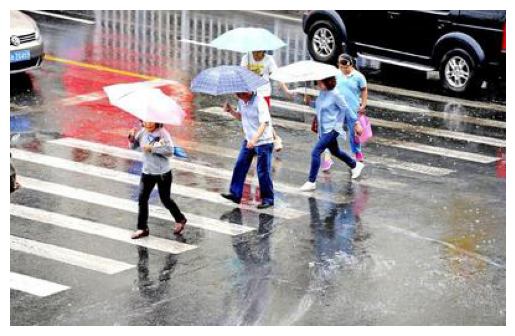

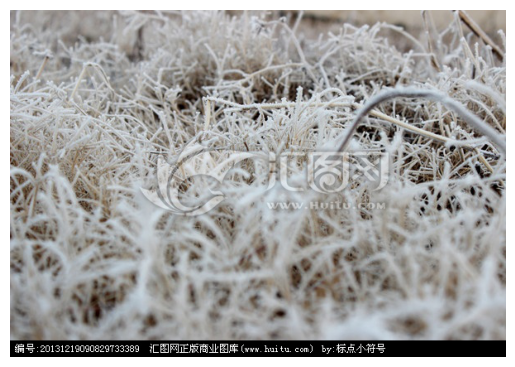

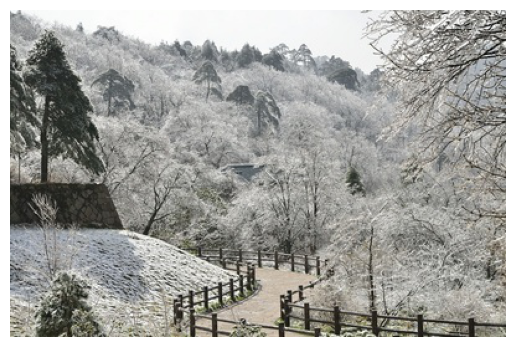

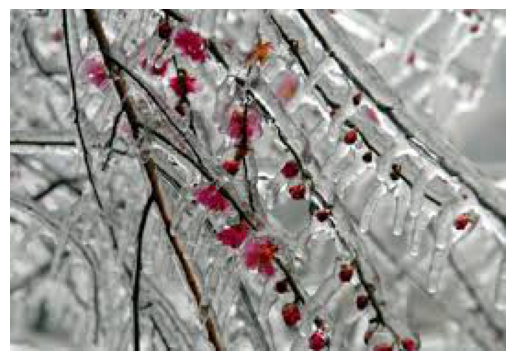

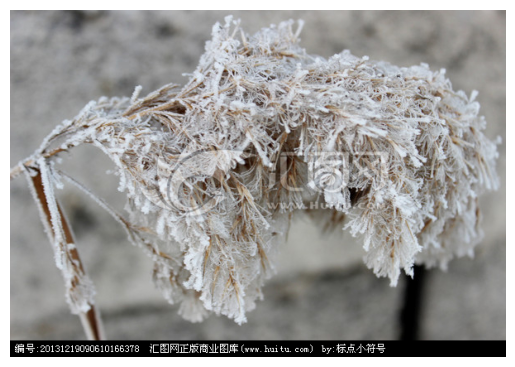

In [33]:
top_5_euc = sorted_indices_euc[:5]
for i in top_5_euc:
    idx = f"{i:06}_"
    img_path = data.loc[idx]["file_path"]
    plot_image(img_path)

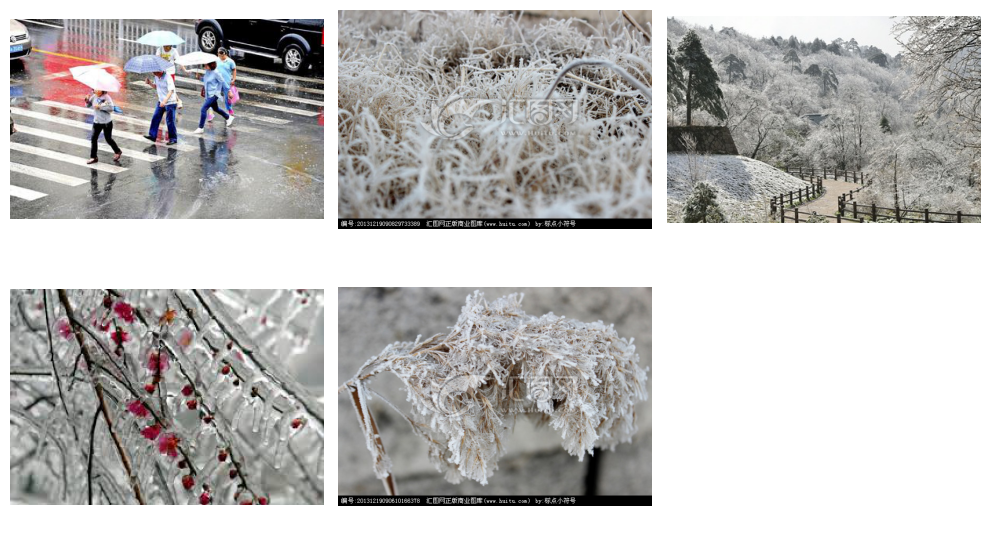

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_images(file_paths):
    num_images = len(file_paths)
    num_rows = 2
    num_cols = (num_images + 1) // 2  # Calculate the number of columns based on the number of images

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            try:
                img = mpimg.imread(file_paths[i])
                ax.imshow(img)
                ax.axis('off')
            except IOError:
                print(f"Unable to open image file: {file_paths[i]}")
        else:
            ax.axis('off')  # Hide unused subplot

    plt.tight_layout()
    plt.show()

# Usage example
file_paths = []
for i in top_5_euc:
    idx = f"{i:06}_"
    img_path = data.loc[idx]["file_path"]
    file_paths.append(img_path)
    
#file_paths = sorted_indices_euc
plot_images(file_paths)